300 300 b'dog29.jpg' b'jpeg' 0.07 0.95666665 0.33333334 0.9533333 b'dog' 1


/root/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


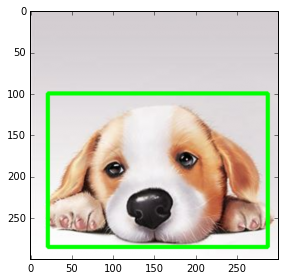

300 300 b'dog279.jpg' b'jpeg' 0.10333333 0.9166667 0.21666667 0.79 b'dog' 1


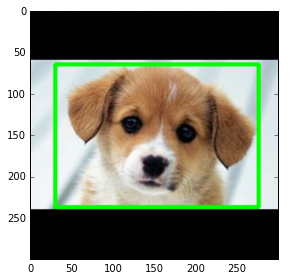

300 300 b'dog31.jpg' b'jpeg' 0.02 0.7966667 0.14 0.87666667 b'dog' 1


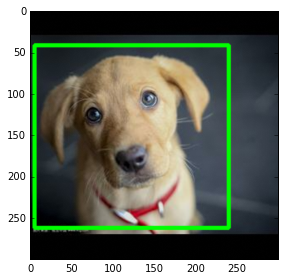

300 300 b'dog140.jpg' b'jpeg' 0.17 0.43 0.25 0.69 b'dog300' 1


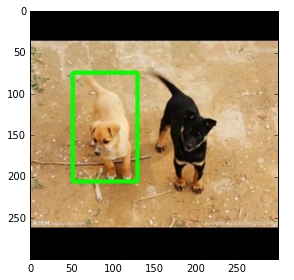

300 300 b'dog187.jpg' b'jpeg' 0.14 0.74666667 0.33333334 0.75666666 b'dog' 1


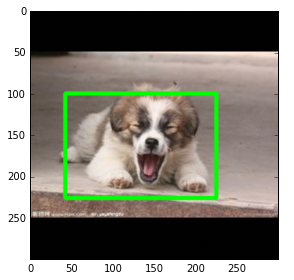

300 300 b'dog158.jpg' b'jpeg' 0.23333333 0.69666666 0.27666667 0.7866667 b'dog' 1


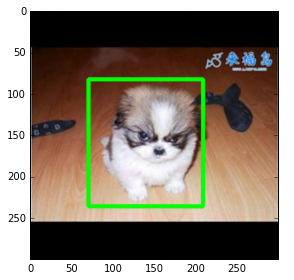

300 300 b'dog226.jpg' b'jpeg' 0.033333335 0.36666667 0.16333333 0.72 b'dog300' 1


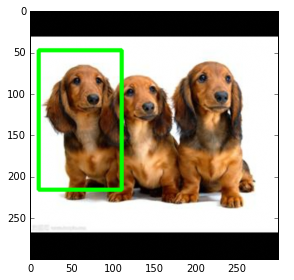

300 300 b'dog301.jpg' b'jpeg' 0.13 0.9866667 0.123333335 0.72333336 b'dog' 1


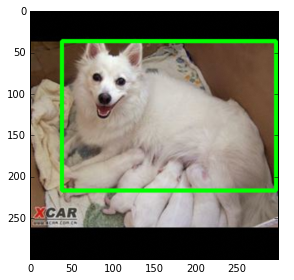

300 300 b'dog234.jpg' b'jpeg' 0.26 0.92 0.07333333 0.9 b'dog' 1


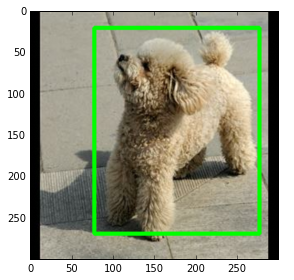

300 300 b'dog19.jpg' b'jpeg' 0.08 0.8666667 0.21666667 0.72 b'dog' 1


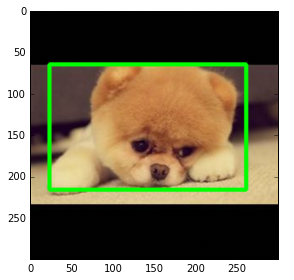

300 300 b'dog311.jpg' b'jpeg' 0.02 0.9633333 0.18666667 0.81333333 b'dog' 1


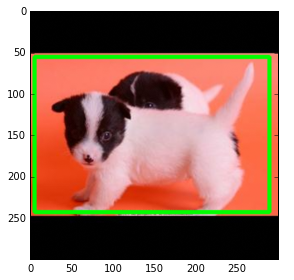

300 300 b'dog117.jpg' b'jpeg' 0.49666667 0.68333334 0.34333333 0.49333334 b'dog' 1


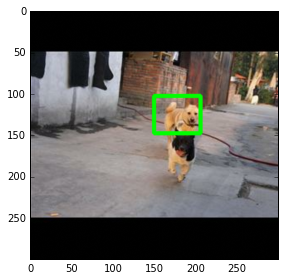

300 300 b'dog283.jpg' b'jpeg' 0.29 0.75333333 0.25333333 0.76 b'dog' 1


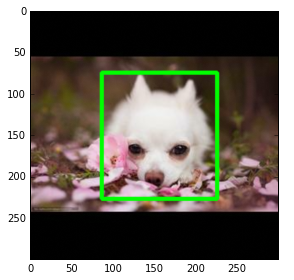

300 300 b'dog262.jpg' b'jpeg' 0.23333333 0.7033333 0.13666667 0.6766667 b'dog' 1


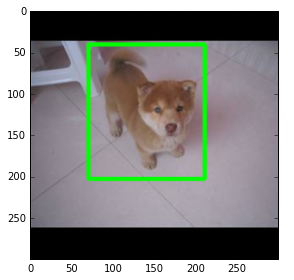

300 300 b'dog217.jpg' b'jpeg' 0.34 0.6766667 0.27333334 0.74333334 b'dog' 1


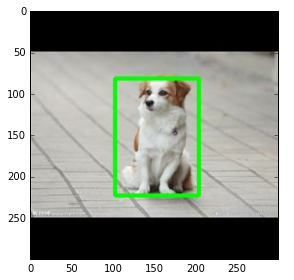

300 300 b'dog0.jpg' b'jpeg' 0.1 0.35333332 0.21 0.6566667 b'dog300' 1


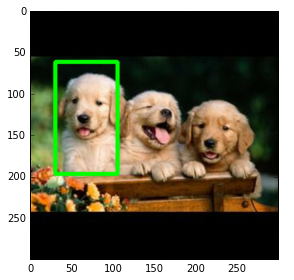

300 300 b'dog250.jpg' b'jpeg' 0.37666667 0.74 0.34333333 0.7733333 b'dog' 1


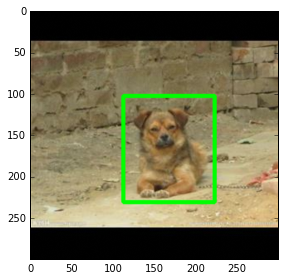

300 300 b'dog143.jpg' b'jpeg' 0.14 0.61333334 0.28666666 0.74333334 b'dog' 1


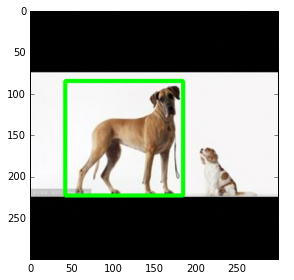

300 300 b'dog195.jpg' b'jpeg' 0.046666667 0.8233333 0.24 0.75666666 b'dog' 1


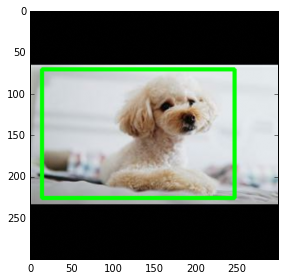

300 300 b'dog129.jpg' b'jpeg' 0.52 0.82666665 0.45333335 0.7633333 b'dog' 1


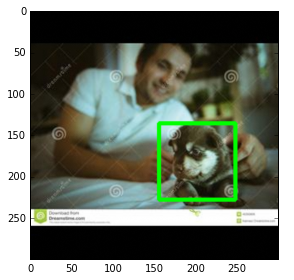

In [19]:
import tensorflow as tf
import numpy as np
import os
import skimage.io as io
import cv2
tfrecords_filename = "train.record"

filename_queue = tf.train.string_input_producer([tfrecords_filename],) 
reader = tf.TFRecordReader()
_, serialized_example = reader.read(filename_queue) 
    
features = tf.parse_single_example(serialized_example,
                                   features={
                                        'image/width':tf.FixedLenFeature([], tf.int64),
                                        'image/height': tf.FixedLenFeature([], tf.int64),
                                        'image/filename':  tf.FixedLenFeature([], tf.string),
                                        'image/source_id': tf.FixedLenFeature([], tf.string),
                                        'image/key/sha256':  tf.FixedLenFeature([], tf.string),
                                        'image/encoded': tf.FixedLenFeature([], tf.string),
                                        'image/format':  tf.FixedLenFeature([], tf.string),
                                        'image/object/bbox/xmin': tf.FixedLenFeature([], tf.float32),
                                        'image/object/bbox/xmax': tf.FixedLenFeature([], tf.float32),
                                        'image/object/bbox/ymin':tf.FixedLenFeature([], tf.float32),
                                        'image/object/bbox/ymax':tf.FixedLenFeature([], tf.float32),
                                        'image/object/class/text':tf.FixedLenFeature([], tf.string),
                                        'image/object/class/label': tf.FixedLenFeature([], tf.int64),
                                   })  

width= tf.cast(features['image/width'], tf.int32)
height = tf.cast(features['image/height'], tf.int32)
filename = tf.cast(features['image/filename'], tf.string)
format = tf.cast(features['image/format'], tf.string)
xmin = tf.cast(features['image/object/bbox/xmin'], tf.float32)
xmax = tf.cast(features['image/object/bbox/xmax'], tf.float32)
ymin = tf.cast(features['image/object/bbox/ymin'], tf.float32)
ymax = tf.cast(features['image/object/bbox/ymax'], tf.float32)
text = tf.cast(features['image/object/class/text'], tf.string)
label = tf.cast(features['image/object/class/label'], tf.int64)

image =tf.image.decode_jpeg(features['image/encoded']);
image = tf.reshape(image,tf.stack([width,height,3]))




with tf.Session() as sess: 
    init_op = tf.initialize_all_variables()
    sess.run(init_op)
    coord=tf.train.Coordinator()
    threads= tf.train.start_queue_runners(coord=coord)
    for i in range(20):
        width1,height1,filename1,format1,xmin1,xmax1,ymin1,ymax1,text1,label1,image1=sess.run([width,height,filename,format,xmin,xmax,ymin,ymax,text,label,image])
        print(width1,height1,filename1,format1,xmin1,xmax1,ymin1,ymax1,text1,label1)
        x1,y1=int(xmin1*width1),int(ymin1*height1)
        x2,y2=int(xmax1*width1),int(ymax1*height1)
        io.imshow(cv2.rectangle(np.array(image1),(x1,y1),(x2,y2),(0,255,0),3), cmap = 'gray', interpolation = 'bicubic')
        io.show()
        
    coord.request_stop()
    coord.join(threads)